**Basic Image Processing**

_This notebook uses scikit-image to give example of basic image processing operation. scikit-image works directly with scipy arrays and is therefore easy to integrate._

In [44]:
# Adapted helper routine from Aurelien Geron: Hand-on Machine Learning with Scikit-learn & Tensorflow.

# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import skimage 

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
NB_ID = "imageprocessing"

# create the directory if it does not exist
os.makedirs(os.path.join(PROJECT_ROOT_DIR, "images", NB_ID), exist_ok = True)
        
def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", NB_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [45]:
def dispImage( imgArray ):
    # Based on post by Joe Kington at https://stackoverflow.com/questions/8056458
    dpi = 282 # 4K at 15.6"
    margin = 0.05 # (5% of the width/height of the figure...)
    xpixels, ypixels = imgArray.shape[1], imgArray.shape[0]

    # Make a figure big enough to accomodate an axis of xpixels by ypixels
    # as well as the ticklabels, etc...
    figsize = (1 + margin) * ypixels / dpi, (1 + margin) * xpixels / dpi

    fig = plt.figure(figsize=figsize, dpi=dpi)
    # Make the axis the right size...
    ax = fig.add_axes([margin, margin, 1 - 2*margin, 1 - 2*margin])

    if len(imgArray.shape) < 3:
        ax.imshow(imgArray, interpolation='none', cmap=plt.cm.gray)
    else:
        ax.imshow(imgArray, interpolation='none')

    plt.show()

In [46]:
def plot_histogram(image, axes, bins=256):
    """Plot an image's histogram along with cumulative histogram.
       Adapted from the scikit-image examples
    """
    image = skimage.img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram with mathplot hist
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = skimage.exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf


Let's read an image and look at it

In [56]:
from skimage.io import imread
horses = skimage.io.imread('horses.JPG')

In [48]:
type(horses)

numpy.ndarray

In [ ]:
horses.shape

(1920, 2560, 3)

In [59]:
horses_red = horses.copy()
horses_red[:,:,0] = horses_red[:,:,0]
horses_red[:,:,1] = 0
horses_red[:,:,2] = 0

# horses_slice.shape

dispImage(horses_red)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#small helper function
from skimage.transform import resize

def downSize( imgArray, factor ):
    imgDown = skimage.transform.resize(imgArray, 
                                       (imgArray.shape[0] / factor, imgArray.shape[1] / factor), 
                                       anti_aliasing=True)
    return imgDown




In [ ]:
horses_slice = horses[:,:,2]
horses_slice.shape

(1920, 2560)

In [ ]:
dispImage(horses_slice)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
smallImg = downSize(horses,4)
print('Resized image is {0} x {1}'.format(smallImg.shape[1], smallImg.shape[0]))

Resized image is 640 x 480


In [ ]:
horses_green = horses.copy()
horses_green[:,:,0] = 0
horses_green[:,:,2] = 0


dispImage(horses_green)

# dispImage(smallImg[0:300,50:200,0])

Output hidden; open in https://colab.research.google.com to view.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Saving figure rgb_histogram


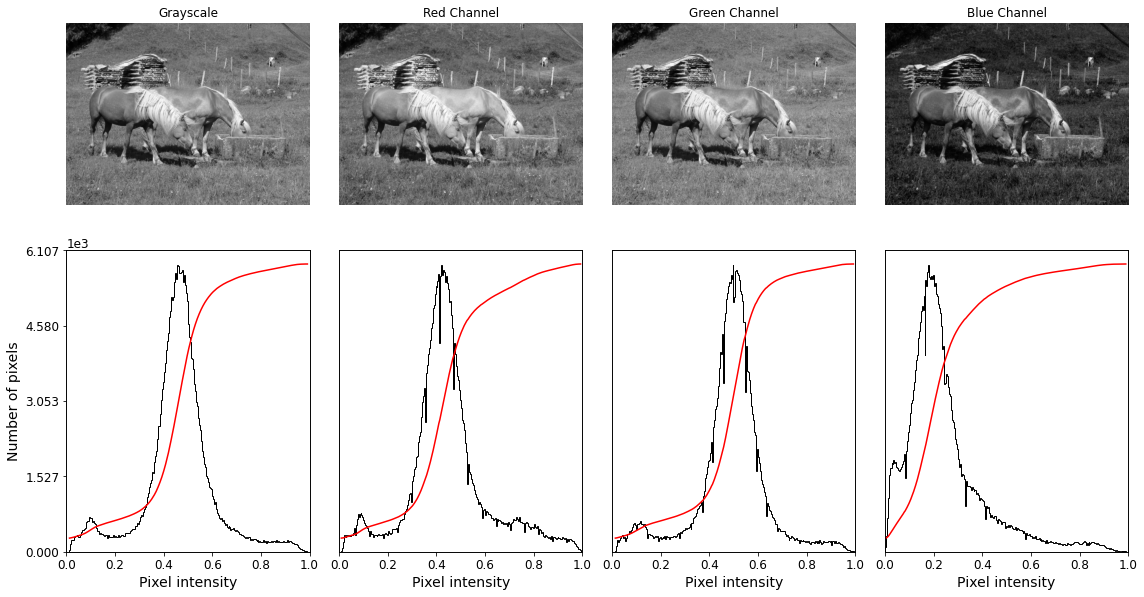

In [ ]:
fig = plt.figure(figsize=(16, 9))
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)
ax_img, ax_hist, ax_cdf = plot_histogram(skimage.color.rgb2gray(smallImg), axes[:, 0])
ax_img.set_title('Grayscale')    

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))p

ax_img, ax_hist, ax_cdf = plot_histogram(smallImg[:,:,0], axes[:, 1])
ax_img.set_title('Red Channel')

ax_img, ax_hist, ax_cdf = plot_histogram(smallImg[:,:,1], axes[:, 2])
ax_img.set_title('Green Channel')

ax_img, ax_hist, ax_cdf = plot_histogram(smallImg[:,:,2], axes[:, 3])
ax_img.set_title('Blue Channel')

save_fig("rgb_histogram")

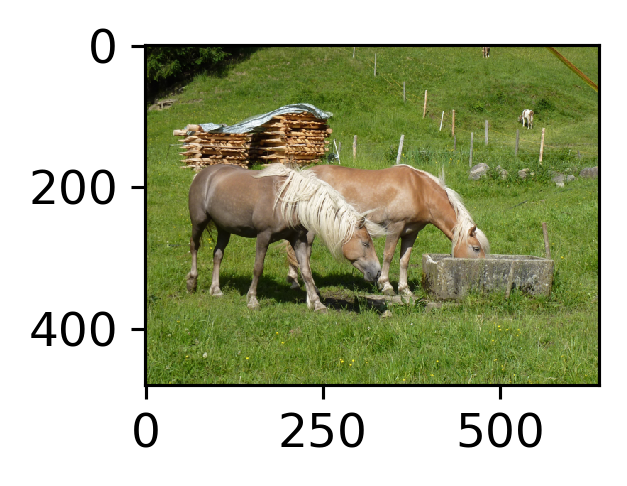

In [ ]:

dispImage(smallImg[:,:,:])

Let's take just the blue channel and pretend that it is a picture that is too dark 

In [ ]:
darkPic = skimage.color.rgb2gray(smallImg)

# darkPic[:,:,0] = 0
# darkPic[:,:,1] = 0


dispImage(darkPic)

Apply various value of gamma correcction

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


Saving figure gamma_histogram


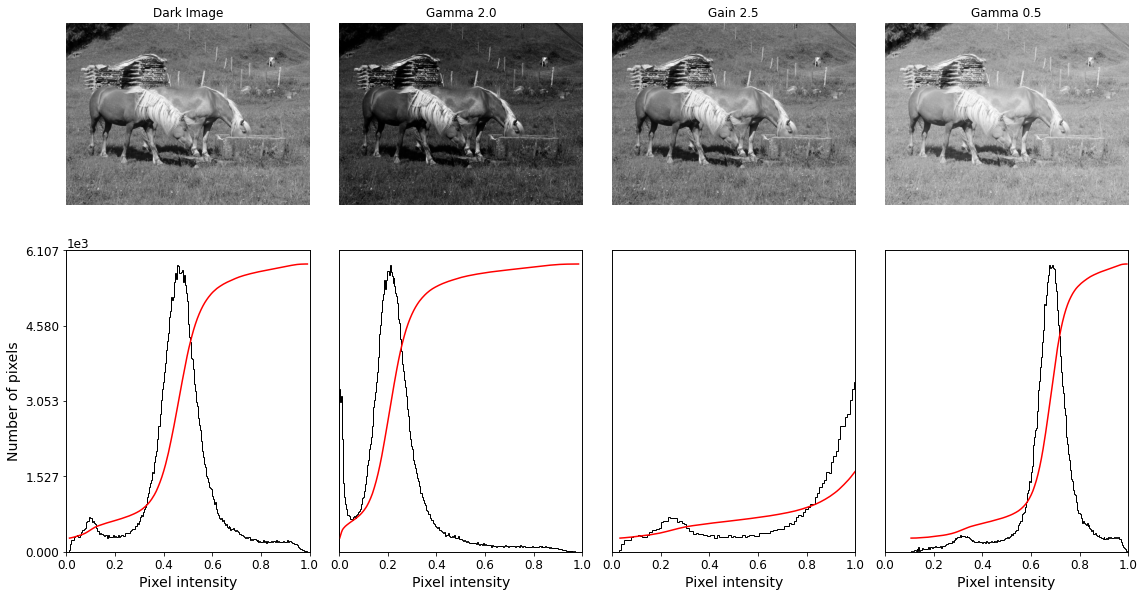

In [ ]:
from skimage.exposure import adjust_gamma

fig = plt.figure(figsize=(16, 9))
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)
ax_img, ax_hist, ax_cdf = plot_histogram(darkPic, axes[:, 0])
ax_img.set_title('Dark Image')    

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_histogram(skimage.exposure.adjust_gamma(darkPic, gamma=2.0, gain=1), axes[:, 1])
ax_img.set_title('Gamma 2.0')

ax_img, ax_hist, ax_cdf = plot_histogram(skimage.exposure.adjust_gamma(darkPic, gamma=1.0, gain=2.5), axes[:, 2])
ax_img.set_title('Gain 2.5')

ax_img, ax_hist, ax_cdf = plot_histogram(skimage.exposure.adjust_gamma(darkPic, gamma=0.5, gain=1.0), axes[:, 3])
ax_img.set_title('Gamma 0.5')

save_fig("gamma_histogram")

# Contrast stretching

In [64]:
from skimage import exposure
x = np.array([5,7,2,6,1,5,3,5,2,7,9,2,1,4.5])/9
x.sort()
print(x)

# print(np.percentile(x, 50)) # Median

# print(np.percentile(x, 25))
# # x

# list(exposure.rescale_intensity(x, in_range=(0.4, 0.6)))


np.percentile(x, (1, 90))

[0.11111111 0.11111111 0.22222222 0.22222222 0.22222222 0.33333333
 0.5        0.55555556 0.55555556 0.55555556 0.66666667 0.77777778
 0.77777778 1.        ]


array([0.11111111, 0.77777778])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


Saving figure rescale_histogram


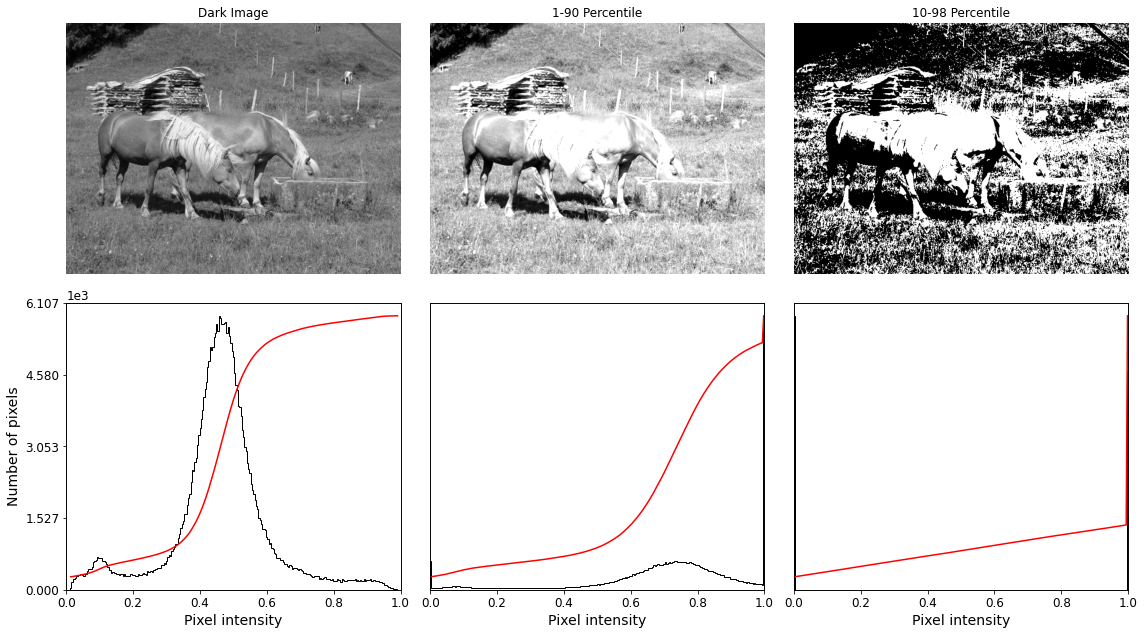

In [ ]:
from skimage import exposure

fig = plt.figure(figsize=(16, 9))
axes = np.zeros((2, 3), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 3, 1)
for i in range(1, 3):
    axes[0, i] = fig.add_subplot(2, 3, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 3):
    axes[1, i] = fig.add_subplot(2, 3, 4+i)
ax_img, ax_hist, ax_cdf = plot_histogram(darkPic, axes[:, 0])
ax_img.set_title('Dark Image')    

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

pLow, pHigh = np.percentile(darkPic, (1, 90))
rescalePic = exposure.rescale_intensity(darkPic, in_range=(pLow, pHigh))

ax_img, ax_hist, ax_cdf = plot_histogram(rescalePic, axes[:, 1])
ax_img.set_title('1-90 Percentile')

pLow, pHigh = np.percentile(darkPic, (50, 60))
rescalePic = exposure.rescale_intensity(darkPic, in_range=(pLow, pHigh))

ax_img, ax_hist, ax_cdf = plot_histogram(rescalePic, axes[:, 2])
ax_img.set_title('10-98 Percentile')

save_fig("rescale_histogram")

# Global Thresholding

Text(0.5, 1.0, 'original image')

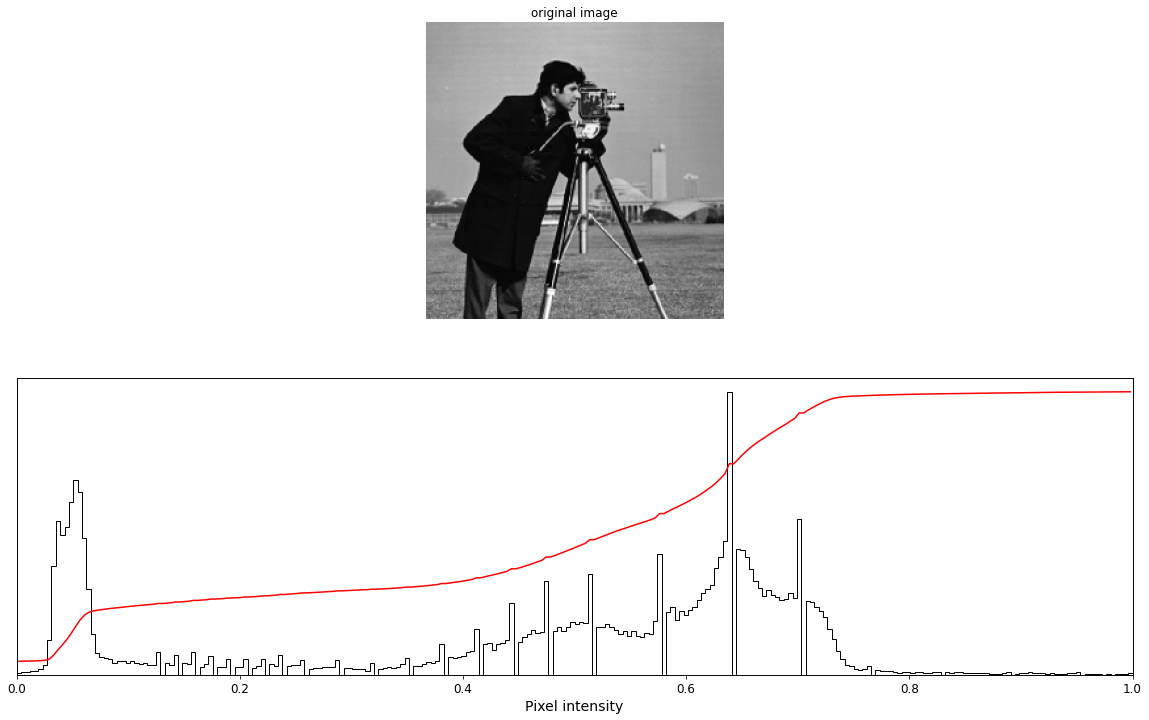

In [66]:
image = skimage.io.imread("thress.png", as_gray=True)
fig, axs = plt.subplots(2, 1,figsize=(20, 12))

ax_img, ax_hist, ax_cdf = plot_histogram(image, axs)
ax_img.set_title('original image')

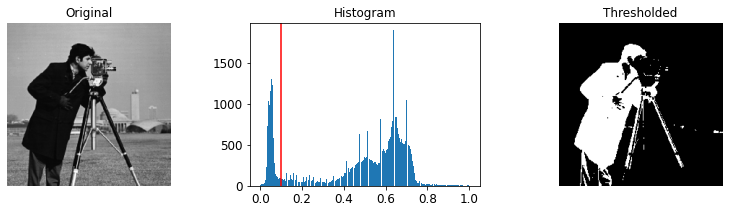

In [68]:
# Apply Global thressholding with value 0.3
thresh = 0.1
binary = (image<thresh).astype(float)
# dispImage(binary)

fig, axes = plt.subplots(ncols=3, figsize=(14, 3))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

Calculated Thresshold is: 0.34


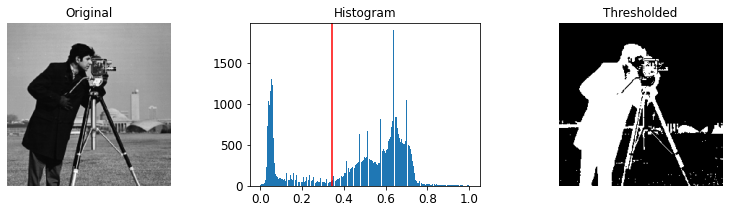

In [69]:
from skimage.filters import threshold_otsu
thresh = threshold_otsu(image)
print ("Calculated Thresshold is:", int(thresh*100)/100)
binary = image < thresh

fig, axes = plt.subplots(ncols=3, figsize=(14, 3))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

# Adaptive(Local) Thresholding

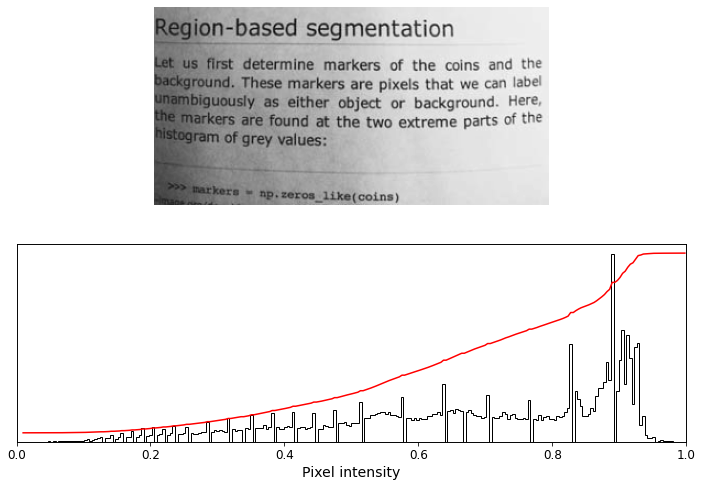

In [70]:
image = skimage.io.imread("thress2.png", as_gray=True)
fig, axs = plt.subplots(2, 1,figsize=(12, 8))

ax_img, ax_hist, ax_cdf = plot_histogram(image, axs)

Calculated Thresshold is: 0.2


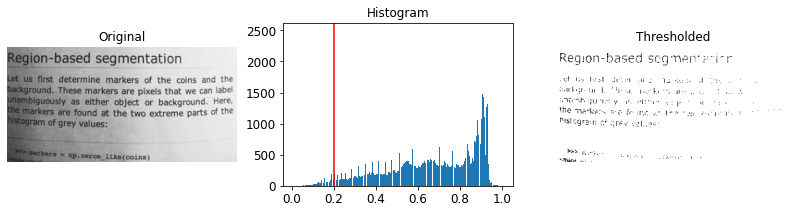

In [73]:
from skimage.filters import threshold_otsu
thresh = 0.2
print ("Calculated Thresshold is:", int(thresh*100)/100)
binary = image > thresh

fig, axes = plt.subplots(ncols=3, figsize=(14, 3))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

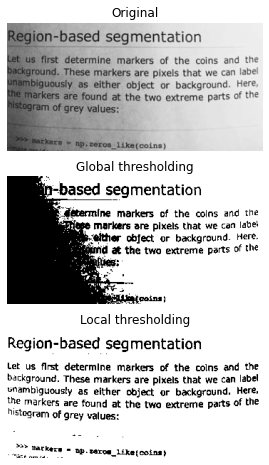

In [76]:
from skimage.filters import threshold_otsu, threshold_local

global_thresh = threshold_otsu(image)
binary_global = image > global_thresh

block_size = 65
local_thresh = threshold_local(image, block_size, offset=0.1)
binary_local = image > local_thresh

fig, axes = plt.subplots(nrows=3, figsize=(7, 8))
ax = axes.ravel()
plt.gray()

ax[0].imshow(image)
ax[0].set_title('Original')

ax[1].imshow(binary_global)
ax[1].set_title('Global thresholding')



ax[2].imshow(binary_local)
ax[2].set_title('Local thresholding')

for a in ax:
    a.axis('off')

plt.show()

# Histogram Equalization

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


Saving figure histogram_equal


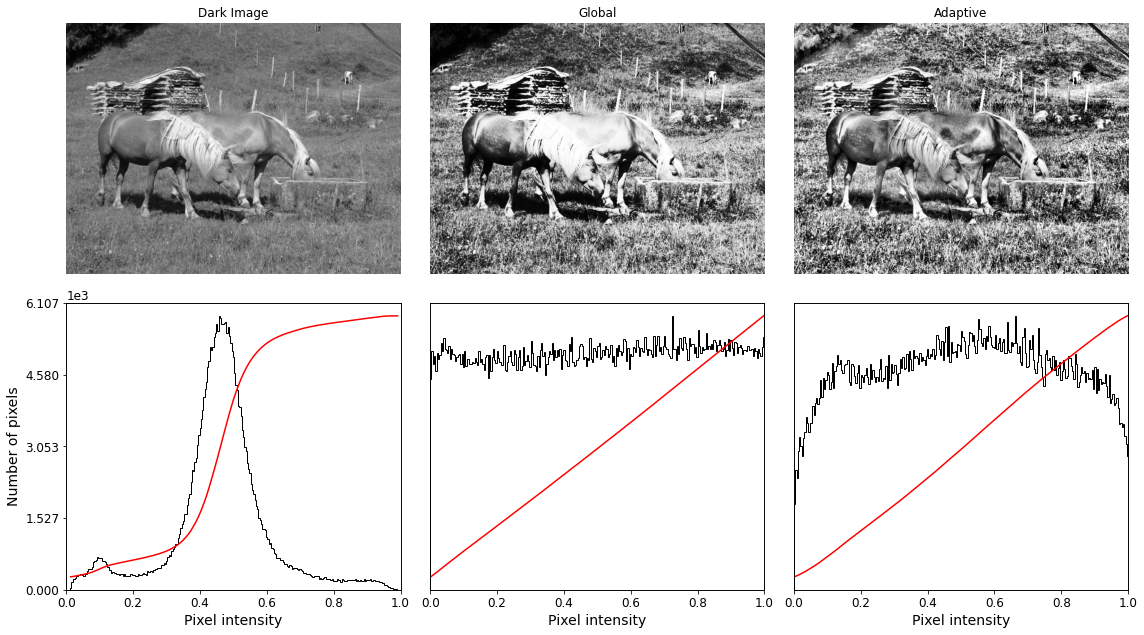

In [ ]:
from skimage import exposure

fig = plt.figure(figsize=(16, 9))
axes = np.zeros((2, 3), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 3, 1)
for i in range(1, 3):
    axes[0, i] = fig.add_subplot(2, 3, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 3):
    axes[1, i] = fig.add_subplot(2, 3, 4+i)
ax_img, ax_hist, ax_cdf = plot_histogram(darkPic, axes[:, 0])
ax_img.set_title('Dark Image')    

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_histogram(exposure.equalize_hist(darkPic), axes[:, 1])
ax_img.set_title('Global')

ax_img, ax_hist, ax_cdf = plot_histogram(exposure.equalize_adapthist(darkPic, clip_limit=0.03), axes[:, 2])
ax_img.set_title('Adaptive')

save_fig("histogram_equal")

Various Edge detectors

Saving figure edge


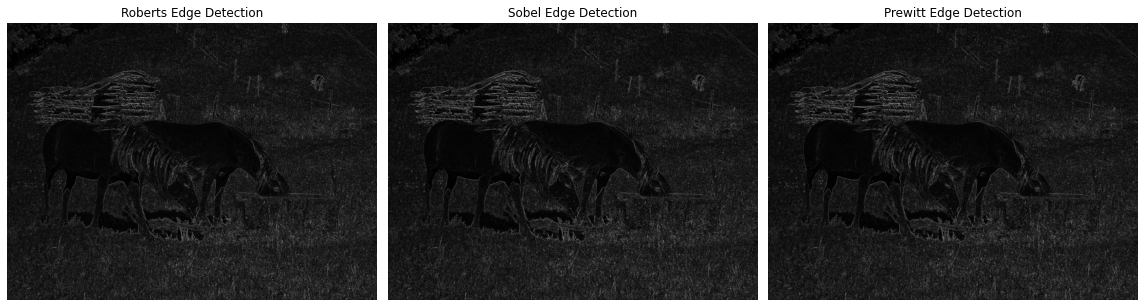

In [ ]:
from skimage.filters import roberts, sobel, prewitt

smallImgGray = skimage.color.rgb2gray(horses)

edge_roberts = roberts(smallImgGray)
edge_sobel = sobel(smallImgGray)
edge_prewitt = prewitt(smallImgGray)

fig, ax = plt.subplots(ncols=3, sharex=True, sharey=True,
                       figsize=(16, 5))

edge_roberts

ax[0].imshow(edge_roberts, cmap=plt.cm.gray)
ax[0].set_title('Roberts Edge Detection')

ax[1].imshow(edge_sobel, cmap=plt.cm.gray)
ax[1].set_title('Sobel Edge Detection')

ax[2].imshow(edge_prewitt, cmap=plt.cm.gray)
ax[2].set_title('Prewitt Edge Detection')


for a in ax:
    a.axis('off')

plt.tight_layout()
save_fig("edge")
plt.show()


Use scipy to get a Gaussian filter size 9x9 with $1.5 \sigma$

Saving figure DoG


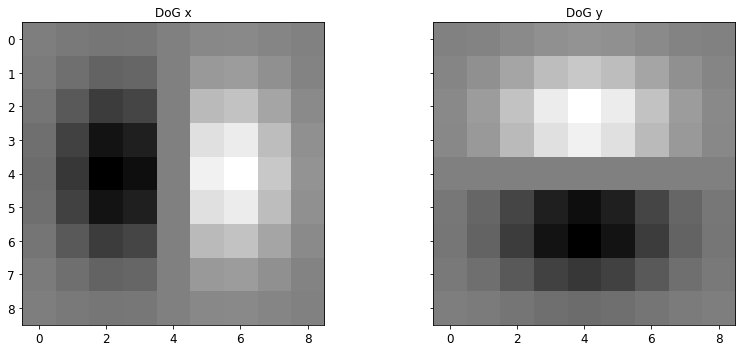

In [80]:
import scipy.ndimage

weights = np.zeros((9, 9))
weights[4,4] = 1.0
gaussF = scipy.ndimage.filters.gaussian_filter(weights, 1.5, order=0,truncate=3.0)

#Sobel mask in x
weights = np.zeros((3,3))
weights[:,0] = -np.ones((3,)) 
weights[:,2] = np.ones((3,)) 
DoGx = scipy.ndimage.convolve(gaussF, weights)

#Sobel mask in y
weights = np.zeros((3,3))
weights[0,:] = np.ones((3,)) 
weights[2,:] = -np.ones((3,)) 
DoGy = scipy.ndimage.convolve(gaussF, weights)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(16, 5))
ax[0].imshow(DoGx, cmap=plt.cm.gray)
ax[0].set_title('DoG x')

ax[1].imshow(DoGy, cmap=plt.cm.gray)
ax[1].set_title('DoG y')

plt.tight_layout()
save_fig("DoG")
plt.show()

Saving figure DevDoG


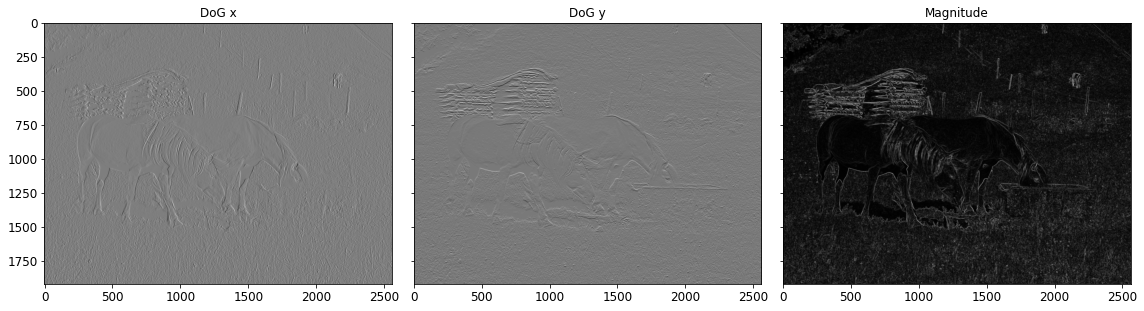

In [ ]:
devX = scipy.ndimage.convolve(smallImgGray, DoGx)
devY = scipy.ndimage.convolve(smallImgGray, DoGy)

fig, ax = plt.subplots(ncols=3, sharex=True, sharey=True,
                       figsize=(16, 5))
ax[0].imshow(devX, cmap=plt.cm.gray)
ax[0].set_title('DoG x')

ax[1].imshow(devY, cmap=plt.cm.gray)
ax[1].set_title('DoG y')

ax[2].imshow(np.sqrt(np.square(devX) + np.square(devY)), cmap=plt.cm.gray)
ax[2].set_title('Magnitude')

plt.tight_layout()
save_fig("DevDoG")
plt.show()

Saving figure OrientDoG


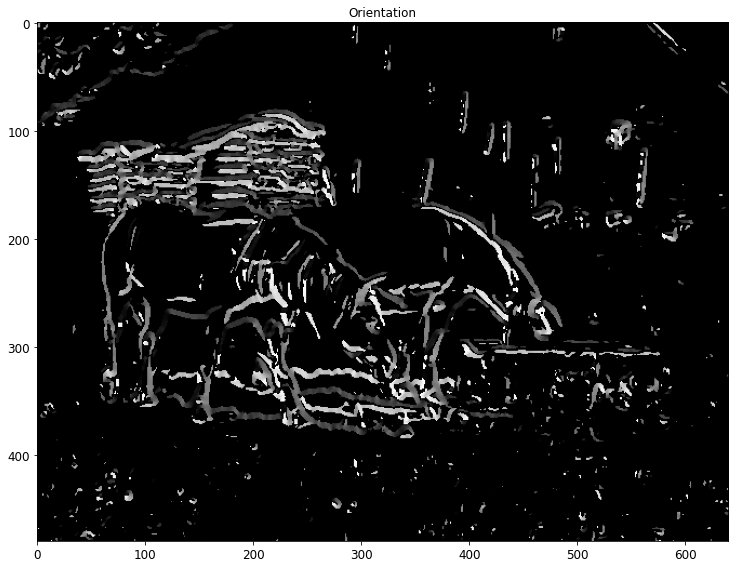

In [ ]:
import math

fig = plt.figure(figsize=(12, 8))

# Calculate the angle but threshold with magnitude
mag = np.sqrt(np.square(devX) + np.square(devY))
angle = np.arctan2(-devY,devX) + math.pi

non_edge_indices = mag < 0.18
angle[non_edge_indices] = 0

ax = plt.imshow(angle)
#
plt.title('Orientation')

plt.tight_layout()
save_fig("OrientDoG")
plt.show()